In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/Users/sriramreddy/Downloads/PROBS AND STATS/HW5/2017.csv')

In [5]:
#As described in the question, I should n't use beta_0

# Multiple Linear Regression

\beta_{OLS} = (X^TX)^{-1}X^TY

In [7]:
df.columns

Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [18]:
y=df.PTS.values

In [19]:
X = df[['FG%','TRB']].values

In [20]:
X.shape

(30, 2)

In [22]:
y=y.reshape((30,1))

In [23]:
y.shape

(30, 1)

In [29]:
# b=(X.T,X)^(-1)*(X.T)*y

In [30]:
def regression(X,y):
    s=np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)
    beta=np.dot(s,y)
    print(beta)
    return beta

In [31]:
beta=regression(X,y)

[[165.62434772]
 [  0.68659874]]


In [39]:
beta.shape

(4, 1)

b)Repeating the same using ORB and DRB

In [32]:
X = df[['FG%','TRB','ORB','DRB']].values

In [33]:
beta=regression(X,y)

[[162.50582182]
 [  2.73594995]
 [ -2.11125196]
 [ -1.98843192]]


# Multicolinearity
It is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors.

# Observation

Here you can observe that the negative effect of the predictor variables "ORB and DRB" has an effect on the increasing the positive effect of "TRB". Thus, we can say that to compensate the predictor variables "ORB" and "DRB", the value of "TRB" is increased.
I have to change this as the product of the terms wiht the x matters most.


# Prediction

In [55]:
tf=pd.read_csv('/Users/sriramreddy/Downloads/PROBS AND STATS/HW5/2018.csv')
test = tf[['FG%','TRB']].values
real=tf[['PTS']].values
def SSE(test,beta,real):
    pred=np.dot(test,beta)
    residual=real-pred
    vec=np.dot((pred-real).T,(pred-real))
    mape=(100/30)*np.sum(np.abs(real-pred)/real)
    return vec,mape,pred,residual
    #Shape of test
    # plt.figure(1)
# https://english.stackexchange.com/questions/107800/is-x-plotted-against-y-or-is-y-plotted-against-x
# # linear
# plt.subplot(221)
# plt.plot(x, y)
# plt.yscale('linear')
# plt.title('linear')
    

In [56]:
real.shape

(30, 1)

In [57]:
a=pd.read_csv('/Users/sriramreddy/Downloads/PROBS AND STATS/HW5/2017.csv')
b=pd.read_csv('/Users/sriramreddy/Downloads/PROBS AND STATS/HW5/a')
c=pd.read_csv('/Users/sriramreddy/Downloads/PROBS AND STATS/HW5/b')
A = a[['FG%','TRB']].values
A1= a[['PTS']].values
B = b[['FG%','TRB']].values
B1= b[['PTS']].values
C = c[['FG%','TRB']].values
C1= c[['PTS']].values

beta1=regression(A,A1)
beta2=regression(B,B1)
beta3=regression(C,C1)

Error1,MAP1,pred1,res1=SSE(test,beta1,real)
Error2,MAP2,pred2,res2=SSE(test,beta2,real)
Error3,MAP3,pred3,res3=SSE(test,beta3,real)


[[165.62434772]
 [  0.68659874]]
[[157.08357583]
 [  0.74961159]]
[[143.46837959]
 [  0.82896939]]


In [58]:
print("Error1 Error2 Error3", Error1, Error2, Error3)
print("MAP1 MAP2 MAP3",MAP1, MAP2, MAP3)

Error1 Error2 Error3 [[139.46621778]] [[199.14276433]] [[680.80933022]]
MAP1 MAP2 MAP3 1.5294427292039536 1.861051799024162 3.927207101939619


In [62]:
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import math
from pylab import rcParams
def show(res1,pred1):
    plt.plot(pred1,res1)
    plt.grid(True)
    plt.title('Residual v/s Prediction', fontsize=20)
    plt.xlabel('Prediction PTS', fontsize=15)
    plt.ylabel('Residual', fontsize=15)
    plt.show()

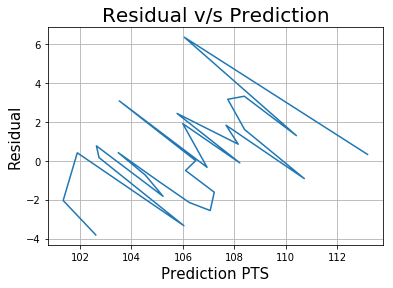

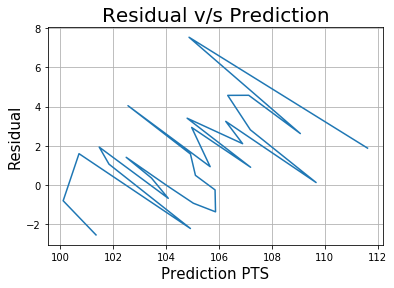

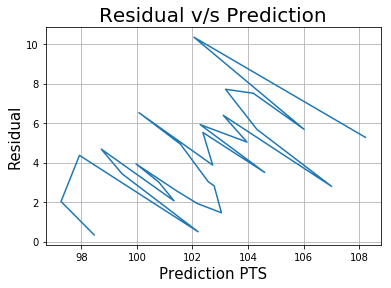

In [63]:
show(res1,pred1)
show(res2,pred2)
show(res3,pred3)

In [ ]:
# Yes, please plot test-set (i.e. real y-values) on the x-axis and corresponding residuals on the y-axis. Scatter plot should be sufficient. 

In [93]:
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import math
from pylab import rcParams
def show(res1,dummy):
    real=tf[['PTS']].values
    plt.plot(real,res1)
    plt.grid(True)
    plt.title('Residual v/s PTS Test data', fontsize=20)
    plt.xlabel('Real PTS on test data', fontsize=15)
    plt.ylabel('Residual', fontsize=15)
    plt.show()

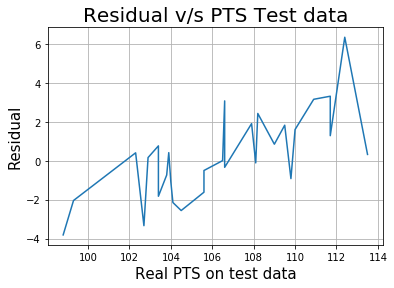

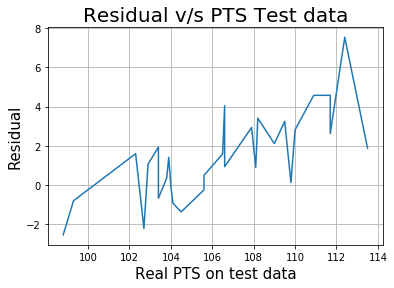

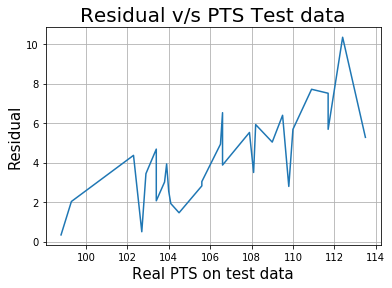

In [94]:
show(res1,pred1)
show(res2,pred2)
show(res3,pred3)

# What can you say about the variance of residuals as a function of prediction?

# Residuals distribution

In [87]:
import collections
print(collections.Counter(['a', 'b', 'c', 'a', 'b', 'b']))
def pdf(res):
#     Prob = dict()
#     for x in res:
#         if x not in Prob:
#             Prob[x] = 1.0
#         else:
#             Prob[x] += 1.0
    Prob=collections.Counter(res.reshape(30).tolist())
    for k in Prob.keys():
        Prob[k] = (Prob[k])/30
    plt.plot(Prob.keys(),Prob.values())
    plt.grid(True)
    plt.title('PDF of the residuals', fontsize=20)
    plt.xlabel('Residual', fontsize=15)
    plt.ylabel('Residual probability', fontsize=15)
    plt.show()
        

Counter({'b': 3, 'a': 2, 'c': 1})


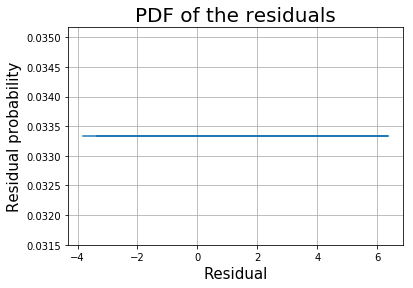

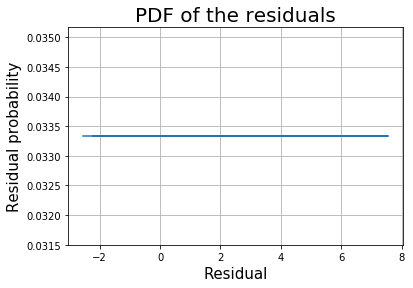

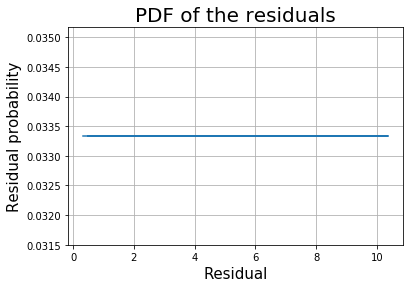

In [89]:
# type(res1)
pdf(res1)
pdf(res2)
pdf(res3)
# collections.Counter(res1.reshape(30).tolist())

In [83]:
Prob=collections.Counter(res1.reshape(30).tolist())

In [86]:
Prob.values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# ECDF

In [101]:
def cdf(res):
    Prob=collections.Counter(res.reshape(30).tolist())
    for k in Prob.keys():
        Prob[k] = (Prob[k])/30
    count=0
    X=[]
    Y=[]
    for k in sorted(Prob.keys()):
        count=count+Prob[k]
        X.append(k)
        Y.append(count)    
    plt.plot(X,Y)
    plt.grid(True)
    plt.title('CDF of the residuals', fontsize=20)
    plt.xlabel('Residual', fontsize=15)
    plt.ylabel('Residual probability', fontsize=15)
    plt.show()

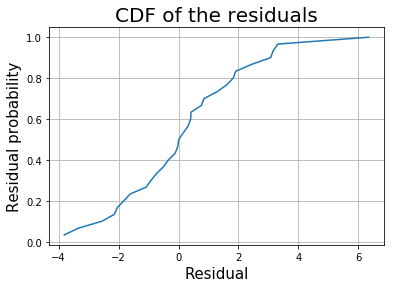

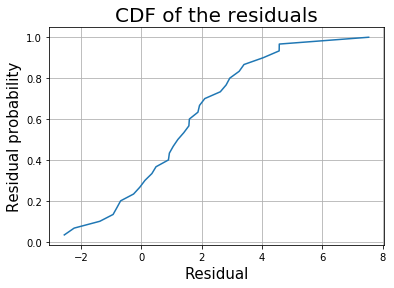

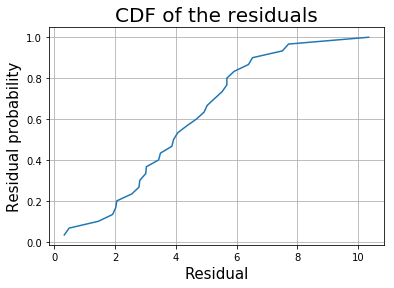

In [102]:
cdf(res1)
cdf(res2)
cdf(res3)